<a href="https://colab.research.google.com/github/janiosl/python.ds/blob/master/estatistica/est_NotLie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Amostra enviesada

Marca X afirma que o uso diário de seu creme dental melhora em *40%* a condições caries.

### Perguntas relacionadas à afirmação "melhora em 40%"

* MELHOROU EM RELAÇÃO AO CONCORRENTE?
* MELHOROU EM RELAÇÃO À PRÓPRIA MARCA X?
* MELHOROU EM RELAÇÃO À SITUAÇÃO DAS PESSSOAS QUE PARTICIPARAM DA PESQUISA?

### Perguntas relacionadas à amostra

* QUANTAS PESSOAS PARTICIPARAM DO ESTUDO?
* ESTAS PESSOAS REPRESENTAM A POPULAÇÃO DO PÚBLICO ALVO?
* COMO FORAM CONDUZIDAS OS ESTUDOS?

# 2 Manipulação ou escolha seletiva de média, moda e mediana

In [1]:
import numpy as np

In [2]:
renda_bairroXPTO = [3000, 2800, 3200, 4500, 20000,
                    50000, 100000, 2000, 2500, 3000]

In [3]:
#Rendimento médio na visão de quem quer mostrar que o bairro tem pessoas de alta renda
np.mean(renda_bairroXPTO)

19100.0

In [4]:
#Rendimento médio na visão de quem quer mostrar que o bairro tem pessoas com renda menor
np.median(renda_bairroXPTO)

3100.0

# 3 Ocultação de dados relevantes sobre os números

## Exemplo da comparação de números absolutos

In [5]:
qi_alunoA = 98
qi_alunoB = 96

In [6]:
me = 3

In [7]:
#Limites Aluno A
print(qi_alunoA - me, qi_alunoA + me)

95 101


In [8]:
#Limites Aluno B
print(qi_alunoB - me, qi_alunoB + me)

93 99


## Exemplo ocultação da amplitude de dados

In [9]:
import pandas as pd
#Carga do conjunto de dados a partir do GitHub do PythonDS
arquivo = 'https://raw.githubusercontent.com/janiosl/python.ds/master/data/mpg.csv'
#Carga e visualização das primeiras observações do conjunto de dados
carros = pd.read_csv(arquivo)
carros.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [10]:
#Média de consumo na estrada
media = carros.hwy.mean()
media

23.44017094017094

In [11]:
#Mediana de consumo na estrada
mediana = carros.hwy.median()
mediana

24.0

In [12]:
len(carros[carros['hwy']==mediana])

13

In [13]:
len(carros[carros['hwy']==media])

0

In [14]:
len(carros[carros['hwy']==int(media)])

7

In [15]:
(13/234)*100

5.555555555555555

In [16]:
(7/234)*100

2.9914529914529915

In [17]:
#Amplitude do consumo (milhas por galão na estrada)
print('Amplitude do consumo na estrada:\n',
      carros.hwy.max() - carros.hwy.min(),
      'milhas por galão')

Amplitude do consumo na estrada:
 32 milhas por galão


In [18]:
carros.hwy.max()

44

In [19]:
carros.hwy.min()

12

# 4 Gráficos enganosos

In [20]:
#Consumo médio por marca
c_mean = carros['hwy'].groupby(by=carros.manufacturer).mean()

#Ordenação (opcional, mas recomendável como boa prática de visualização)
c_mean.sort_values(ascending=False, inplace=True)

#Exibição
c_mean

manufacturer
honda         32.555556
volkswagen    29.222222
hyundai       26.857143
audi          26.444444
pontiac       26.400000
subaru        25.571429
toyota        24.911765
nissan        24.615385
chevrolet     21.894737
ford          19.360000
mercury       18.000000
dodge         17.945946
jeep          17.625000
lincoln       17.000000
land rover    16.500000
Name: hwy, dtype: float64

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns

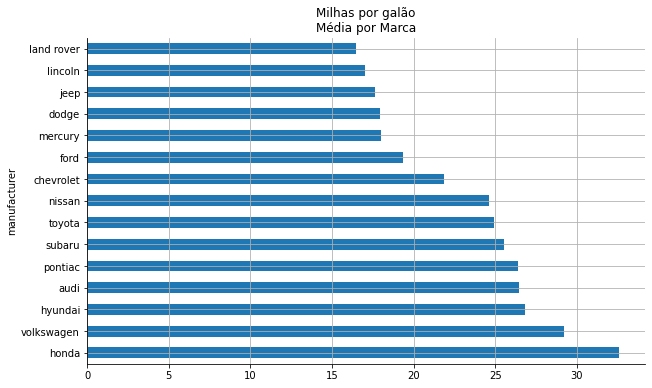

In [22]:
#Visualização do consumo médio
plt.figure(figsize=(10,6))

c_mean.plot(
    kind='barh',
    title='Milhas por galão\nMédia por Marca')

plt.grid()
sns.despine()

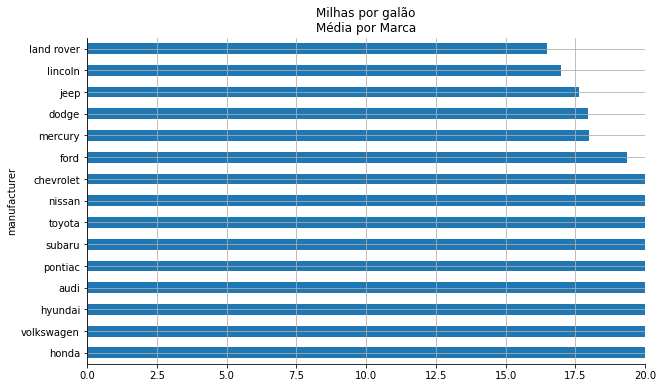

In [23]:
#Visualização do consumo médio
plt.figure(figsize=(10,6))

c_mean.plot(
    kind='barh',
    title='Milhas por galão\nMédia por Marca',
    xlim=(0,20))

plt.grid()
sns.despine()

# 5 Correlações espúrias

Exemplo simples para entender a correlação.
*ATENÇÃO*: Apesar de serem dados fictícios, não há problemas aparentes neles ou na correlação identificada.

In [24]:
"""
Exemplo
Dados socio-econômicos de famílias
"""
colunas = ['FAMILIA', 'RENDA', 'POUPANCA', 'FILHOS', 'ANOS_ESTUDO']
familias = pd.DataFrame({'d1': list('ABCDEFGHIJ'),
                        'd2': [10, 15, 12, 70, 80,
                               100, 20, 30, 10, 60],
                        'd3': [4, 7, 5, 20, 20,
                               30, 8, 8, 3, 15],
                        'd4': [8, 6, 5, 1, 2,
                               2, 3, 2, 6, 1],
                        'd5': [3, 4, 5, 12, 16,
                               18, 8, 8, 4, 8]
                         })
familias.columns = colunas
familias

,FAMILIA,RENDA,POUPANCA,FILHOS,ANOS_ESTUDO
0,A,10,4,8,3
1,B,15,7,6,4
2,C,12,5,5,5
3,D,70,20,1,12
4,E,80,20,2,16
5,F,100,30,2,18
6,G,20,8,3,8
7,H,30,8,2,8
8,I,10,3,6,4
9,J,60,15,1,8


In [25]:
#Cálculo da correlação
corr1 = familias['RENDA'].corr(familias['POUPANCA'])
print(corr1)

0.9835181477979665


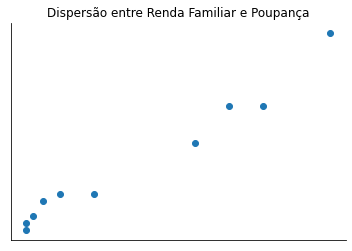

In [26]:
#Demonstração gráfica
plt.scatter(familias['RENDA'],
            familias['POUPANCA'])
plt.title('Dispersão entre Renda Familiar e Poupança')
plt.xticks([])
plt.yticks([])
sns.despine()

Agora vejamos alguns exemplos de correlações espúrias:

[Correlações espúrias](https://www.tylervigen.com/spurious-correlations)

# Referências

Darrel Huff, Irving Geis. **Como mentir com estatística**. Intrínseca, 2019.

Hadley Wickham, Winston Chang, Lionel Henry, Thomas Lin Pedersen, Kohske Takahashi, Claus Wilke, Kara Woo, Hiroaki Yutani, Dewey (2021) **ggplot2**. Disponível em: https://ggplot2.tidyverse.org/reference/mpg.html

McKinney, Wes. **Python para Análise de Dados**: tratamento de dados com pandas, numpy e iPython. Traduzido por Lúcia A. Kinoshita. Novatec, 2018.

Morettin, Pedro. A., Bussab, Wilton de O. Estatística Básica. 9. ed. São Paulo: Saraiva, 2017.

Toledo, Geraldo Luciano e Ovalle, Ivo Izidório **Estatítisca Básica**. São Paulo: Atlas, 1985.